In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import c

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/SN.xlsx')
print (display(data))

,Name,m,M,Host Name,z,Type
0,SN2018L,16.86,-18.4400,NGC 3214,0.025820,Ia
1,SN2018bq,16.10,-19.1800,NaN,0.025628,Ia
2,SN2017eaw,12.14,-11.7100,NGC 6946,0.000133,IIP
3,SN2017ckc,18.30,-18.6000,NaN,0.054000,Ia
4,SN2017ein,14.42,-15.9670,NGC 3938,0.002699,Ic
...,...,...,...,...,...,...
105,SN2017fco,17.72,-18.3000,NaN,0.036000,Ia
106,SN2017fwm,17.60,-16.5984,ESO 141-IG32,0.015557,Ic
107,SN2017oz,17.67,-19.3000,NaN,0.056000,Ia
108,SN2017bzg,16.33,-20.0000,LEDA 613129,0.050000,Ia


None


In [ ]:
# counting different numbers of SN in data:
d = data.Type.value_counts()
print (d)

Ia     85
IIn    10
IIP     8
Ic      4
IIb     3
Name: Type, dtype: int64


It is useful to have a look at different aspects of data:

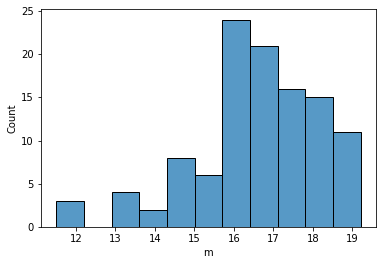

In [ ]:
sns.histplot(data.m, stat = 'count')

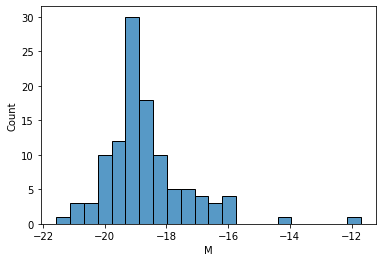

In [ ]:
sns.histplot(data.M, stat = 'count')

For drawing Hubble diagram, we need velocity and distance, so in the following I am going to calculate them:

In [ ]:
# since z is small enough for all data, we can easily use the v = z*c relation:
data['velocity'] = data['z']*c*0.001 # we must calculate velocity in km/s unit
print (display(data))

,Name,m,M,Host Name,z,Type,velocity
0,SN2018L,16.86,-18.4400,NGC 3214,0.025820,Ia,7740.641266
1,SN2018bq,16.10,-19.1800,NaN,0.025628,Ia,7683.081114
2,SN2017eaw,12.14,-11.7100,NGC 6946,0.000133,IIP,39.872397
3,SN2017ckc,18.30,-18.6000,NaN,0.054000,Ia,16188.792732
4,SN2017ein,14.42,-15.9670,NGC 3938,0.002699,Ic,809.139844
...,...,...,...,...,...,...,...
105,SN2017fco,17.72,-18.3000,NaN,0.036000,Ia,10792.528488
106,SN2017fwm,17.60,-16.5984,ESO 141-IG32,0.015557,Ic,4663.871269
107,SN2017oz,17.67,-19.3000,NaN,0.056000,Ia,16788.377648
108,SN2017bzg,16.33,-20.0000,LEDA 613129,0.050000,Ia,14989.622900


None


Now, using m and M, we can calculate distance:

In [ ]:
# distance:
data['distance'] = (10**((data['m']-data['M']+5)/5)) * 0.000001 # the unit of distance should be Mpc
print (display(data))

,Name,m,M,Host Name,z,Type,velocity,distance
0,SN2018L,16.86,-18.4400,NGC 3214,0.025820,Ia,7740.641266,114.815362
1,SN2018bq,16.10,-19.1800,NaN,0.025628,Ia,7683.081114,113.762729
2,SN2017eaw,12.14,-11.7100,NGC 6946,0.000133,IIP,39.872397,0.588844
3,SN2017ckc,18.30,-18.6000,NaN,0.054000,Ia,16188.792732,239.883292
4,SN2017ein,14.42,-15.9670,NGC 3938,0.002699,Ic,809.139844,11.950883
...,...,...,...,...,...,...,...,...
105,SN2017fco,17.72,-18.3000,NaN,0.036000,Ia,10792.528488,159.955803
106,SN2017fwm,17.60,-16.5984,ESO 141-IG32,0.015557,Ic,4663.871269,69.132140
107,SN2017oz,17.67,-19.3000,NaN,0.056000,Ia,16788.377648,247.742206
108,SN2017bzg,16.33,-20.0000,LEDA 613129,0.050000,Ia,14989.622900,184.501542


None


After these, we cab save our data:

In [ ]:
SN_c = data.to_csv('/content/drive/MyDrive/SN_c')